Systolic Blood Pressure Data

In [48]:
#import statements
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
#for heat_map
import seaborn as sns
#for linear regression
from sklearn import linear_model
#for ols method
import statsmodels.formula.api as sm
#for plotting scatter matrix
from pandas.tools.plotting import scatter_matrix
import math
#for getting p value
import statsmodels.stats.diagnostic as sms
#for ridge regression
from sklearn.linear_model import Ridge, RidgeCV, Lasso, LassoCV
#for mean squared error
from sklearn.metrics import mean_squared_error as mse
from sklearn.preprocessing import scale

from plotly.offline import plot
import plotly.plotly as py
import plotly.graph_objs as go

from sklearn import preprocessing

In [21]:
#Loading data
systolic_bp = pd.read_csv('Ex03_SystolicBP_Regreesion.csv')
systolic_bp

,Age,Treated,Gender,FamilySize,Diet,Weight,Height,ScaledBMI,SystolicBP
0,45,1,0,2,2,99.149109,1.680932,35.090422,117.280944
1,62,1,1,4,1,76.609814,1.509772,33.609452,127.346514
2,61,1,0,2,2,72.619743,1.692017,25.365606,122.021401
3,51,1,0,3,2,73.858286,1.604062,28.704958,117.430179
4,42,1,0,2,1,83.861856,1.648855,30.846062,112.765810
5,56,1,1,2,1,66.470791,1.579815,26.632895,119.457681
6,66,0,0,4,2,89.829075,1.648000,33.075221,123.128291
7,60,1,0,3,1,100.565423,1.645454,37.143020,128.089503
8,46,0,0,1,2,91.589776,1.635356,34.247003,110.978105
9,45,0,0,2,2,76.058688,1.401059,38.746804,112.710507


In [22]:
correlation_matrix = systolic_bp.corr()
correlation_matrix

,Age,Treated,Gender,FamilySize,Diet,Weight,Height,ScaledBMI,SystolicBP
Age,1.000000,-0.072606,0.075297,0.004664,-0.114006,-0.028380,0.151895,-0.126357,0.669539
Treated,-0.072606,1.000000,0.050122,-0.052271,-0.117269,-0.006899,-0.069158,0.033868,0.476901
Gender,0.075297,0.050122,1.000000,-0.152274,-0.004839,-0.003728,-0.002139,-0.007238,0.083053
FamilySize,0.004664,-0.052271,-0.152274,1.000000,0.071975,-0.038084,-0.178930,0.088567,0.020711
Diet,-0.114006,-0.117269,-0.004839,0.071975,1.000000,0.214507,-0.030904,0.150477,-0.071370
Weight,-0.028380,-0.006899,-0.003728,-0.038084,0.214507,1.000000,-0.100371,0.725423,0.361718
Height,0.151895,-0.069158,-0.002139,-0.178930,-0.030904,-0.100371,1.000000,-0.746394,-0.307311
ScaledBMI,-0.126357,0.033868,-0.007238,0.088567,0.150477,0.725423,-0.746394,1.000000,0.447285
SystolicBP,0.669539,0.476901,0.083053,0.020711,-0.071370,0.361718,-0.307311,0.447285,1.000000


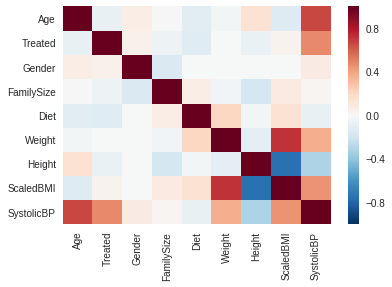

In [23]:
correlation_plot = sns.heatmap(correlation_matrix,
            xticklabels = correlation_matrix.columns.values,
            yticklabels = correlation_matrix.columns.values)
for label in correlation_plot.xaxis.get_ticklabels():
    label.set_rotation(90)
plt.figure(figsize=(12,12))
plt.show()


Finding Rmse value

In [24]:
#splitting train data and test data
data = systolic_bp.copy()
data_x = data.iloc[:,0:8]
data_y = data.iloc[:,-1]
data_train = data.iloc[0:75,:]
data_test = data.iloc[75:,:]

data_x_train = data_train.iloc[:,0:8]
data_y_train = data_train.iloc[:,-1]

data_x_test = data_test.iloc[:,0:8]
data_y_test = data_test.iloc[:,-1]

#fitting data via logistic regression
regr = linear_model.LinearRegression()
print(regr.fit(data_x_train, data_y_train))
#Finding the coefficient and intercept of the line of best fit
print(regr.coef_,"....", regr.intercept_)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)
[  6.50600002e-01   6.44097990e+00   2.60992351e-02   4.60767424e-03
  -2.76507085e-02   3.71358927e-03   4.12692398e-01   5.70610066e-01] .... 60.4379062075


In [25]:
data_x.shape

(100, 8)

root mean squared error is 0.1194998797890182
percentage of accuracy is 0.999617000166


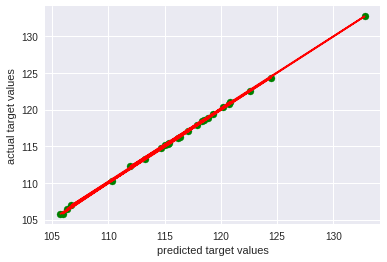

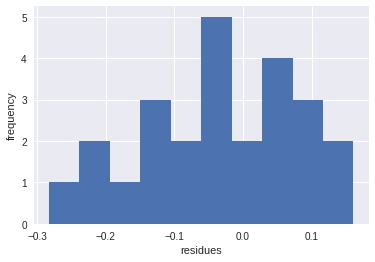

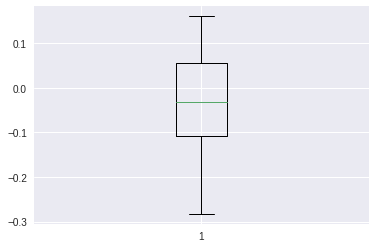

In [26]:
#finding rmse
mean_squared_error = np.mean(((regr.predict(data_x_test)-data_y_test)**2))
rmse = math.sqrt(mean_squared_error)
print("root mean squared error is",rmse)
print("percentage of accuracy is",regr.score(data_x_test,data_y_test))

#predicted values vs actual target values
plt.scatter(regr.predict(data_x_test),data_y_test,color = 'g')
plt.plot(regr.predict(data_x_test),data_y_test,color = 'r')
plt.xlabel('predicted target values')
plt.ylabel('actual target values')
plt.show()

#histogram of residues
plt.hist(regr.predict(data_x_test)-data_y_test)
plt.xlabel('residues')
plt.ylabel('frequency')
plt.show()

#boxplot of residues
plt.boxplot(np.array(regr.predict(data_x_test)-data_y_test))
plt.show()

ols method

In [27]:
model_1 = sm.ols(formula="SystolicBP ~ Age + Treated + Gender + FamilySize + Diet + Weight + Height + ScaledBMI", data=systolic_bp).fit()
print(model_1.params)
print(model_1.summary())

Intercept     60.103024
Age            0.650124
Treated        6.431615
Gender         0.035602
FamilySize    -0.004782
Diet          -0.039539
Weight        -0.000181
Height         0.691647
ScaledBMI      0.579271
dtype: float64
                            OLS Regression Results                            
Dep. Variable:             SystolicBP   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 3.935e+04
Date:                Sat, 01 Apr 2017   Prob (F-statistic):          1.67e-157
Time:                        18:27:35   Log-Likelihood:                 82.718
No. Observations:                 100   AIC:                            -147.4
Df Residuals:                      91   BIC:                            -124.0
Df Model:                           8                                         
Covariance Type:            nonrobust                     

Rmse value ignoring familysize

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)
[  6.50610233e-01   6.43929657e+00   2.45322635e-02  -2.65731931e-02
   3.86201177e-03   3.85514298e-01   5.70203896e-01] .... 60.4932485045
0.0139240837182

 root mean squared error after ignoring familysize is 0.11800035473744053
percentage of accuracy is 0.999626551882


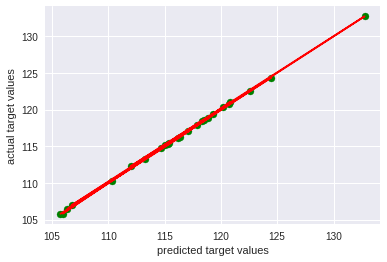

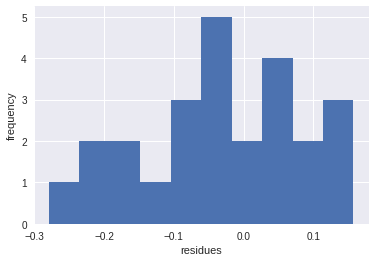

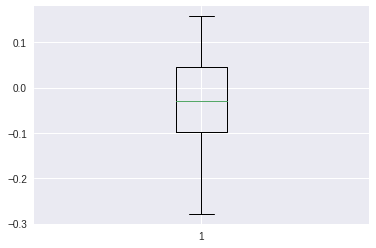

In [28]:
#splitting train data and test data
data_x_train_copy1 = data_x_train.copy()
data_x_test_copy1 = data_x_test.copy()

#dropping familysize
data_x_train_other = data_x_train_copy1.drop('FamilySize', axis = 1)
data_x_test_other = data_x_test_copy1.drop('FamilySize', axis = 1)

#fitting data via logistic regression
regr2 = linear_model.LinearRegression()
print(regr2.fit(data_x_train_other, data_y_train))
#Finding the coefficient and intercept of the line of best fit
print(regr2.coef_,"....", regr2.intercept_)

#finding rmse
mean_squared_error = np.mean(((regr2.predict(data_x_test_other)-data_y_test)**2))
print(mean_squared_error)
rmse = math.sqrt(mean_squared_error)
print("\n root mean squared error after ignoring familysize is",rmse)
print("percentage of accuracy is",regr2.score(data_x_test_other,data_y_test))

#predicted values vs actual target values
plt.scatter(regr2.predict(data_x_test_other),data_y_test,color = 'g')
plt.plot(regr2.predict(data_x_test_other),data_y_test,color = 'r')
plt.xlabel('predicted target values')
plt.ylabel('actual target values')
plt.show()

#histogram of residues
plt.hist(regr2.predict(data_x_test_other)-data_y_test)
plt.xlabel('residues')
plt.ylabel('frequency')
plt.show()

#boxplot of residues
plt.boxplot(np.array(regr2.predict(data_x_test_other)-data_y_test))
plt.show()


ols method

In [29]:
model_2 = sm.ols(formula="SystolicBP ~ Age + Treated + Gender + Diet + Weight + Height + ScaledBMI", data=systolic_bp).fit()
print(model_2.params)
print(model_2.summary())

Intercept    60.042466
Age           0.650092
Treated       6.432151
Gender        0.037251
Diet         -0.040309
Weight       -0.000338
Height        0.721136
ScaledBMI     0.579771
dtype: float64
                            OLS Regression Results                            
Dep. Variable:             SystolicBP   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 4.536e+04
Date:                Sat, 01 Apr 2017   Prob (F-statistic):          8.36e-160
Time:                        18:27:37   Log-Likelihood:                 82.606
No. Observations:                 100   AIC:                            -149.2
Df Residuals:                      92   BIC:                            -128.4
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
           

#Rmse value ignoring familysize and gender

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)
[  6.50784559e-01   6.44146674e+00  -2.29460704e-02   4.06384091e-03
   3.56672871e-01   5.69444144e-01] .... 60.5417226613

 root mean squared error after ignoring familysize and gender is 0.12196698416754997
percentage of accuracy is 0.99960102267


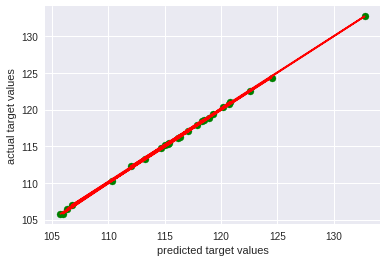

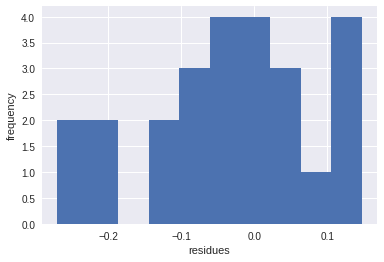

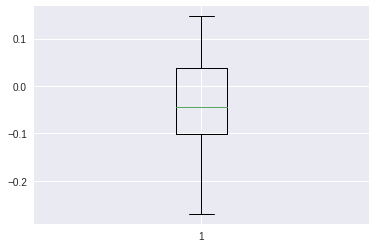

In [30]:
#splitting train data and test data
data_x_train_copy2 = data_x_train.copy()
data_x_test_copy2 = data_x_test.copy()

#dropping familysize and gender
data_x_train_other2 = data_x_train_copy2.drop(['FamilySize', 'Gender'], axis = 1)
data_x_test_other2 = data_x_test_copy2.drop(['FamilySize', 'Gender'], axis = 1)

#fitting data via logistic regression
regr3 = linear_model.LinearRegression()
print(regr3.fit(data_x_train_other2, data_y_train))
#Finding the coefficient and intercept of the line of best fit
print(regr3.coef_,"....", regr3.intercept_)

#finding rmse
mean_squared_error = np.mean(((regr3.predict(data_x_test_other2)-data_y_test)**2))
rmse = math.sqrt(mean_squared_error)
print("\n root mean squared error after ignoring familysize and gender is",rmse)
print("percentage of accuracy is",regr3.score(data_x_test_other2,data_y_test))

#predicted values vs actual target values
plt.scatter(regr3.predict(data_x_test_other2),data_y_test,color = 'g')
plt.plot(regr3.predict(data_x_test_other2),data_y_test,color = 'r')
plt.xlabel('predicted target values')
plt.ylabel('actual target values')
plt.show()

#histogram of residues
plt.hist(regr3.predict(data_x_test_other2)-data_y_test)
plt.xlabel('residues')
plt.ylabel('frequency')
plt.show()

#boxplot of residues
plt.boxplot(np.array(regr3.predict(data_x_test_other2)-data_y_test))
plt.show()


ols method

In [31]:
model_3 = sm.ols(formula="SystolicBP ~ Age + Treated + Diet + Weight + Height + ScaledBMI", data=systolic_bp).fit()
print(model_3.params)
print(model_3.summary())

Intercept    60.120603
Age           0.650292
Treated       6.434116
Diet         -0.040052
Weight        0.000093
Height        0.675885
ScaledBMI     0.578658
dtype: float64
                            OLS Regression Results                            
Dep. Variable:             SystolicBP   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 5.193e+04
Date:                Sat, 01 Apr 2017   Prob (F-statistic):          1.38e-161
Time:                        18:27:39   Log-Likelihood:                 81.121
No. Observations:                 100   AIC:                            -148.2
Df Residuals:                      93   BIC:                            -130.0
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err  

Rmse value ignoring familysize, gender and diet

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)
[  6.50960313e-01   6.44485098e+00   3.53952513e-03   3.79456471e-01
   5.70079117e-01] .... 60.481527621

 root mean squared error after ignoring familysize,gender and diet is 0.1258183818403384
percentage of accuracy is 0.999575427521


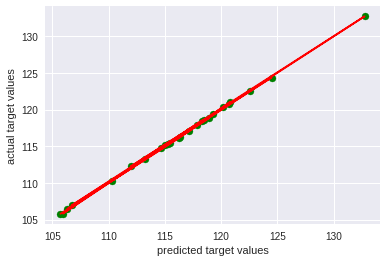

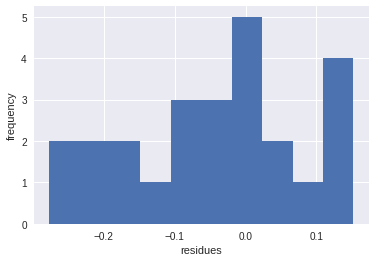

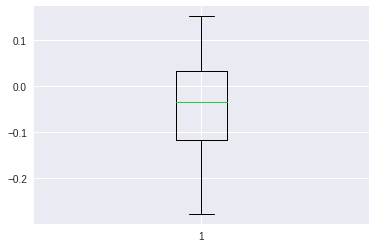

In [32]:
#splitting train data and test data
data_x_train_copy3 = data_x_train.copy()
data_x_test_copy3 = data_x_test.copy()

#dropping familysize,gender and diet
data_x_train_other3 = data_x_train_copy3.drop(['FamilySize', 'Gender','Diet'], axis = 1)
data_x_test_other3 = data_x_test_copy3.drop(['FamilySize', 'Gender','Diet'], axis = 1)

#fitting data via logistic regression
regr4 = linear_model.LinearRegression()
print(regr4.fit(data_x_train_other3, data_y_train))
#Finding the coefficient and intercept of the line of best fit
print(regr4.coef_,"....", regr4.intercept_)

#finding rmse
mean_squared_error = np.mean(((regr4.predict(data_x_test_other3)-data_y_test)**2))
rmse = math.sqrt(mean_squared_error)
print("\n root mean squared error after ignoring familysize,gender and diet is",rmse)
print("percentage of accuracy is",regr4.score(data_x_test_other3,data_y_test))

#predicted values vs actual target values
plt.scatter(regr4.predict(data_x_test_other3),data_y_test,color = 'g')
plt.plot(regr4.predict(data_x_test_other3),data_y_test,color = 'r')
plt.xlabel('predicted target values')
plt.ylabel('actual target values')
plt.show()

#histogram of residues
plt.hist(regr4.predict(data_x_test_other3)-data_y_test)
plt.xlabel('residues')
plt.ylabel('frequency')
plt.show()

#boxplot of residues
plt.boxplot(np.array(regr4.predict(data_x_test_other3)-data_y_test))
plt.show()

scatter matrix plot

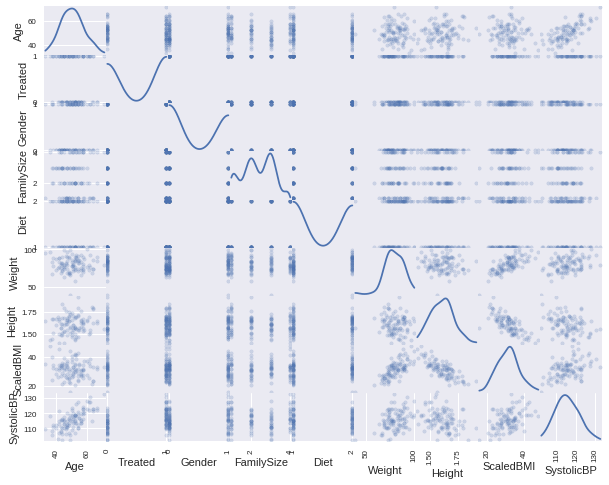

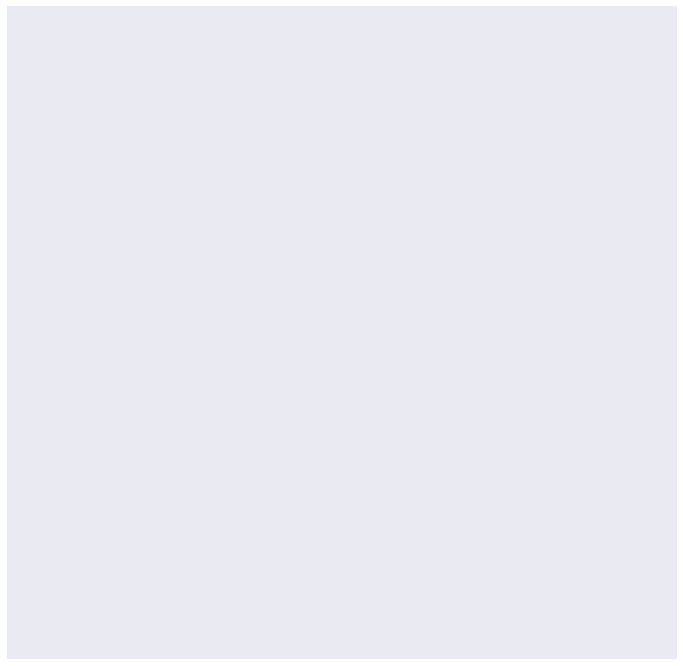

In [33]:

scatter_matrix(systolic_bp, alpha=0.2, figsize=(10, 8), diagonal='kde')
plt.figure(figsize = (12,12))
plt.xticks(())
plt.yticks(())
plt.show()

In [34]:
name = ['F statistics', 'p_value']
test = sms.het_goldfeldquandt(model_2.resid, model_2.model.exog)
list(zip(name,test))

[('F statistics', 0.83969197332463141), ('p_value', 0.71309294538408907)]

Ridge Regression

In [35]:
alphas = 10**np.linspace(10,-2,100)*0.5
ridge = Ridge(normalize=True)
coefs = []
for a in alphas:
    ridge.set_params(alpha=a)
    ridge.fit(data_x_train,data_y_train)
    coefs.append(ridge.coef_)
coefs
coefs_df = pd.DataFrame(coefs)
coefs_df.columns = data_x_train.columns
coefs_df['Alpha'] = pd.DataFrame(alphas)
coefs_df

,Age,Treated,Gender,FamilySize,Diet,Weight,Height,ScaledBMI,Alpha
0,1.045441e-10,1.245278e-09,1.850272e-10,-4.534773e-11,-1.871356e-10,4.359860e-11,-3.248320e-09,9.337178e-11,5.000000e+09
1,1.382011e-10,1.646185e-09,2.445950e-10,-5.994703e-11,-2.473823e-10,5.763478e-11,-4.294088e-09,1.234320e-10,3.782317e+09
2,1.826937e-10,2.176159e-09,3.233403e-10,-7.924644e-11,-3.270248e-10,7.618978e-11,-5.676532e-09,1.631698e-10,2.861184e+09
3,2.415103e-10,2.876755e-09,4.274368e-10,-1.047591e-10,-4.323075e-10,1.007184e-10,-7.504041e-09,2.157009e-10,2.164381e+09
4,3.192624e-10,3.802900e-09,5.650463e-10,-1.384854e-10,-5.714851e-10,1.331438e-10,-9.919900e-09,2.851439e-10,1.637275e+09
5,4.220462e-10,5.027210e-09,7.469579e-10,-1.830696e-10,-7.554697e-10,1.760083e-10,-1.311352e-08,3.769435e-10,1.238538e+09
6,5.579202e-10,6.645676e-09,9.874344e-10,-2.420072e-10,-9.986865e-10,2.326726e-10,-1.733531e-08,4.982971e-10,9.369087e+08
7,7.375376e-10,8.785193e-09,1.305330e-09,-3.199192e-10,-1.320205e-09,3.075795e-10,-2.291626e-08,6.587194e-10,7.087371e+08
8,9.749814e-10,1.161351e-08,1.725570e-09,-4.229144e-10,-1.745233e-09,4.066020e-10,-3.029394e-08,8.707883e-10,5.361336e+08
9,1.288868e-09,1.535237e-08,2.281102e-09,-5.590680e-10,-2.307095e-09,5.375039e-10,-4.004681e-08,1.151131e-09,4.055654e+08


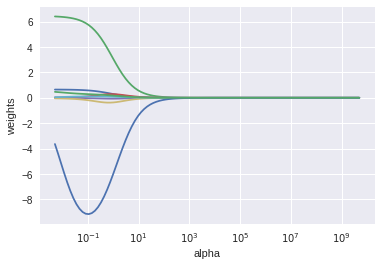

In [36]:
ax = plt.gca()
ax.plot(alphas, coefs)
ax.set_xscale("log")
plt.axis("tight")
plt.xlabel('alpha')
plt.ylabel('weights')


In [49]:
trace0 = go.Scatter(
    x = coefs_df.Alpha,
    y = coefs_df.Age,
    name = 'Age',
    line = dict(
        color = ('rgb(205, 12, 24)'),
        width = 4)
)
trace1 = go.Scatter(
    x = coefs_df.Alpha,
    y = coefs_df.Treated,
    name = 'Treated',
    line = dict(
        color = ('rgb(22, 96, 167)'),
        width = 4,)
)
trace2 = go.Scatter(
    x = coefs_df.Alpha,
    y = coefs_df.Gender,
    name = 'Gender',
    line = dict(
        color = ('rgb(205, 12, 24)'),
        width = 4,
        dash = 'dash') # dash options include 'dash', 'dot', and 'dashdot'
)
trace3 = go.Scatter(
    x = coefs_df.Alpha,
    y = coefs_df.FamilySize,
    name = 'FamilySize',
    line = dict(
        color = ('rgb(22, 96, 167)'),
        width = 4,
        dash = 'dash')
)
trace4 = go.Scatter(
    x = coefs_df.Alpha,
    y = coefs_df.Diet,
    name = 'Diet',
    line = dict(
        color = ('rgb(205, 12, 24)'),
        width = 4,
        dash = 'dot')
)
trace5 = go.Scatter(
    x = coefs_df.Alpha,
    y = coefs_df.Weight,
    name = 'Weight',
    line = dict(
        color = ('rgb(22, 96, 167)'),
        width = 4,
        dash = 'dot')
)
trace6 = go.Scatter(
    x = coefs_df.Alpha,
    y = coefs_df.Height,
    name = 'Height',
    line = dict(
        color = ('rgb(40, 123, 167)'),
        width = 4,
        dash = 'dot')
)
trace7 = go.Scatter(
    x = coefs_df.Alpha,
    y = coefs_df.ScaledBMI,
    name = 'ScaledBMI',
    line = dict(
        color = ('rgb(40, 123, 167)'),
        width = 4,
        dash = 'dot')
)
data1 = [trace0, trace1, trace2, trace3, trace4, trace5, trace6]

layout = dict(title = 'Alpha vs weights',
              xaxis = dict(title = 'Alpha'),
              yaxis = dict(title = 'Weights'),
              )

fig = dict(data=data1, layout=layout)
plot(fig)

'file:///home/user/ml_assgn/temp-plot.html'

In [50]:
ridge2 = Ridge(alpha=10**10, normalize=True)
ridge2.fit(data_x_train,data_y_train)
# Fit a ridge regression on the training data
pred2 = ridge2.predict(data_x_test)
# Use this model to predict the test data
print(pd.Series(ridge2.coef_, index=data_x_test.columns))
# Print coefficients
#rss = mse.mean_squared_error(data_y_test, pred2)
rss = mse(data_y_test, pred2)
print(rss)

Age           5.227203e-11
Treated       6.226392e-10
Gender        9.251359e-11
FamilySize   -2.267386e-11
Diet         -9.356781e-11
Weight        2.179930e-11
Height       -1.624160e-09
ScaledBMI     4.668589e-11
dtype: float64
38.0147173523


In [51]:
ridgecv = RidgeCV(alphas=alphas, scoring="mean_squared_error", normalize=True)
ridgecv.fit(data_x_train,data_y_train)
alpha_value = ridgecv.alpha_
print(alpha_value)

0.005


/home/user/ml_assgn/lib/python3.5/site-packages/sklearn/metrics/scorer.py:90: DeprecationWarning:

Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.

/home/user/ml_assgn/lib/python3.5/site-packages/sklearn/metrics/scorer.py:90: DeprecationWarning:

Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.

/home/user/ml_assgn/lib/python3.5/site-packages/sklearn/metrics/scorer.py:90: DeprecationWarning:

Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.

/home/user/ml_assgn/lib/python3.5/site-packages/sklearn/metrics/scorer.py:90: DeprecationWarning:

Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.

/home/user/ml_assgn/lib/python3.5/site-packages/sklearn/metrics/scorer.py:90: DeprecationWarning:

Scoring method mean_squared_error

In [52]:
ridge4 = Ridge(alpha=alpha_value, normalize=True)
ridge4.fit(data_x_train,data_y_train)
pred2 = ridge4.predict(data_x_test)
mse(data_y_test, pred2)

0.018712202317639103

In [53]:
ridge4.fit(data_x_train,data_y_train)
pd.Series(ridge4.coef_, index=data_x_train.columns)

Age           0.646856
Treated       6.400236
Gender        0.023586
FamilySize   -0.002478
Diet         -0.043930
Weight        0.044843
Height       -3.639720
ScaledBMI     0.465896
dtype: float64

The Lasso regression

In [54]:
#lasso = Lasso(max_iter=10000, normalize=True)
alphas = 10**np.linspace(10,-2,100)*0.5
lasso = Lasso(normalize=True)
coefs_lasso = []
for a in alphas:
    lasso.set_params(alpha=a)
    lasso.fit(scale(data_x_train), data_y_train)
    coefs_lasso.append(lasso.coef_)


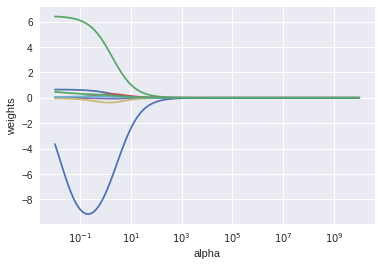

In [55]:
ax = plt.gca()
ax.plot(alphas*2, coefs)
ax.set_xscale("log")
plt.axis("tight")
plt.xlabel('alpha')
plt.ylabel('weights')

In [56]:
coefs_lasso_df = pd.DataFrame(coefs_lasso)
coefs_lasso_df.columns = data_x_train.columns
coefs_lasso_df['Alpha'] = pd.DataFrame(alphas)
coefs_lasso_df

,Age,Treated,Gender,FamilySize,Diet,Weight,Height,ScaledBMI,Alpha
0,0.000000,0.000000,0.0,-0.0,-0.0,0.000000,-0.0,0.000000,5.000000e+09
1,0.000000,0.000000,0.0,-0.0,-0.0,0.000000,-0.0,0.000000,3.782317e+09
2,0.000000,0.000000,0.0,-0.0,-0.0,0.000000,-0.0,0.000000,2.861184e+09
3,0.000000,0.000000,0.0,-0.0,-0.0,0.000000,-0.0,0.000000,2.164381e+09
4,0.000000,0.000000,0.0,-0.0,-0.0,0.000000,-0.0,0.000000,1.637275e+09
5,0.000000,0.000000,0.0,-0.0,-0.0,0.000000,-0.0,0.000000,1.238538e+09
6,0.000000,0.000000,0.0,-0.0,-0.0,0.000000,-0.0,0.000000,9.369087e+08
7,0.000000,0.000000,0.0,-0.0,-0.0,0.000000,-0.0,0.000000,7.087371e+08
8,0.000000,0.000000,0.0,-0.0,-0.0,0.000000,-0.0,0.000000,5.361336e+08
9,0.000000,0.000000,0.0,-0.0,-0.0,0.000000,-0.0,0.000000,4.055654e+08


In [57]:
trace0 = go.Scatter(
    x = coefs_lasso_df.Alpha,
    y = coefs_lasso_df.Age,
    name = 'Age',
    line = dict(
        color = ('rgb(205, 12, 24)'),
        width = 4)
)
trace1 = go.Scatter(
    x = coefs_lasso_df.Alpha,
    y = coefs_lasso_df.Treated,
    name = 'Treated',
    line = dict(
        color = ('rgb(22, 96, 167)'),
        width = 4,)
)
trace2 = go.Scatter(
    x = coefs_lasso_df.Alpha,
    y = coefs_lasso_df.Gender,
    name = 'Gender',
    line = dict(
        color = ('rgb(205, 12, 24)'),
        width = 4,
        dash = 'dash') # dash options include 'dash', 'dot', and 'dashdot'
)
trace3 = go.Scatter(
    x = coefs_lasso_df.Alpha,
    y = coefs_lasso_df.FamilySize,
    name = 'FamilySize',
    line = dict(
        color = ('rgb(22, 96, 167)'),
        width = 4,
        dash = 'dash')
)
trace4 = go.Scatter(
    x = coefs_lasso_df.Alpha,
    y = coefs_lasso_df.Diet,
    name = 'Diet',
    line = dict(
        color = ('rgb(205, 12, 24)'),
        width = 4,
        dash = 'dot')
)
trace5 = go.Scatter(
    x = coefs_lasso_df.Alpha,
    y = coefs_lasso_df.Weight,
    name = 'Weight',
    line = dict(
        color = ('rgb(22, 96, 167)'),
        width = 4,
        dash = 'dot')
)
trace6 = go.Scatter(
    x = coefs_lasso_df.Alpha,
    y = coefs_lasso_df.Height,
    name = 'Height',
    line = dict(
        color = ('rgb(40, 123, 167)'),
        width = 4,
        dash = 'dot')
)
trace7 = go.Scatter(
    x = coefs_lasso_df.Alpha,
    y = coefs_lasso_df.ScaledBMI,
    name = 'ScaledBMI',
    line = dict(
        color = ('rgb(40, 123, 167)'),
        width = 4,
        dash = 'dot')
)
data1 = [trace0, trace1, trace2, trace3, trace4, trace5, trace6,trace7]

layout = dict(title = 'Alpha vs weights',
              xaxis = dict(title = 'Alpha'),
              yaxis = dict(title = 'Weights'),
              )

fig = dict(data=data1, layout=layout)
plot(fig)

'file:///home/user/ml_assgn/temp-plot.html'

In [45]:
lassocv = LassoCV(alphas=None, cv=10, max_iter=100000, normalize=True)
lassocv.fit(data_x_train,data_y_train)

LassoCV(alphas=None, copy_X=True, cv=10, eps=0.001, fit_intercept=True,
    max_iter=100000, n_alphas=100, n_jobs=1, normalize=True,
    positive=False, precompute='auto', random_state=None,
    selection='cyclic', tol=0.0001, verbose=False)

In [46]:
lasso.set_params(alpha=lassocv.alpha_)
lasso.fit(data_x_train,data_y_train)
mse(data_y_test, lasso.predict(data_x_test))

0.01509874705896113

In [47]:
lasso.fit(data_x_train,data_y_train)
pd.Series(lasso.coef_, index=data_x_train.columns)

Age           0.649683
Treated       6.428381
Gender        0.008430
FamilySize    0.000000
Diet         -0.010175
Weight        0.007062
Height       -0.000000
ScaledBMI     0.559717
dtype: float64